In [2]:
load("NHANES2.RData")
dim(NHANES2)


[1] 500  12

In [3]:
# Check variables
str(NHANES2)

'data.frame':	500 obs. of  12 variables:
 $ wgt   : num  78 78 75.3 90.7 112 ...
 $ gender: Factor w/ 2 levels "male","female": 1 1 2 1 2 1 2 2 1 1 ...
 $ bili  : num  1.1 0.7 0.5 0.8 0.6 0.7 1.1 0.8 0.8 0.5 ...
 $ age   : num  67 39 64 36 33 62 56 63 55 20 ...
 $ chol  : num  6.13 4.65 4.14 3.47 6.31 4.47 6.41 5.51 7.01 3.75 ...
 $ HDL   : num  1.09 1.14 1.29 1.37 1.27 0.85 1.81 2.38 2.79 1.03 ...
 $ hgt   : num  1.75 1.78 1.63 1.93 1.73 ...
 $ educ  : Ord.factor w/ 5 levels "Less than 9th grade"<..: 5 3 5 4 4 3 4 5 4 2 ...
 $ race  : Factor w/ 5 levels "Mexican American",..: 5 3 5 3 4 5 4 5 3 3 ...
 $ SBP   : num  139 103 NaN 115 107 ...
 $ hypten: Factor w/ 2 levels "no","yes": 2 1 2 2 1 2 NA 1 2 1 ...
 $ WC    : num  91.6 84.5 91.6 95.4 119.6 ...


In [4]:
# Check limits
summary(NHANES2)

      wgt            gender         bili             age             chol      
 Min.   : 39.01   male  :252   Min.   :0.2000   Min.   :20.00   Min.   : 2.07  
 1st Qu.: 65.20   female:248   1st Qu.:0.6000   1st Qu.:31.00   1st Qu.: 4.27  
 Median : 76.20                Median :0.7000   Median :43.00   Median : 4.86  
 Mean   : 78.25                Mean   :0.7404   Mean   :45.02   Mean   : 5.00  
 3rd Qu.: 86.41                3rd Qu.:0.9000   3rd Qu.:58.00   3rd Qu.: 5.64  
 Max.   :167.38                Max.   :2.9000   Max.   :79.00   Max.   :10.68  
                               NA's   :47                       NA's   :41     
      HDL             hgt                          educ    
 Min.   :0.360   Min.   :1.397   Less than 9th grade : 31  
 1st Qu.:1.110   1st Qu.:1.626   9-11th grade        : 69  
 Median :1.320   Median :1.676   High school graduate:115  
 Mean   :1.395   Mean   :1.687   some college        :148  
 3rd Qu.:1.590   3rd Qu.:1.753   College or above    :136  


In [5]:
# default dry run
require(mice)
imp0 <- mice(NHANES2, maxit = 0)
imp0

Loading required package: mice
Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind



Class: mids
Number of multiple imputations:  5 
Imputation methods:
     wgt   gender     bili      age     chol      HDL      hgt     educ 
      ""       ""    "pmm"       ""    "pmm"    "pmm"    "pmm"   "polr" 
    race      SBP   hypten       WC 
      ""    "pmm" "logreg"    "pmm" 
PredictorMatrix:
       wgt gender bili age chol HDL hgt educ race SBP hypten WC
wgt      0      1    1   1    1   1   1    1    1   1      1  1
gender   1      0    1   1    1   1   1    1    1   1      1  1
bili     1      1    0   1    1   1   1    1    1   1      1  1
age      1      1    1   0    1   1   1    1    1   1      1  1
chol     1      1    1   1    0   1   1    1    1   1      1  1
HDL      1      1    1   1    1   0   1    1    1   1      1  1

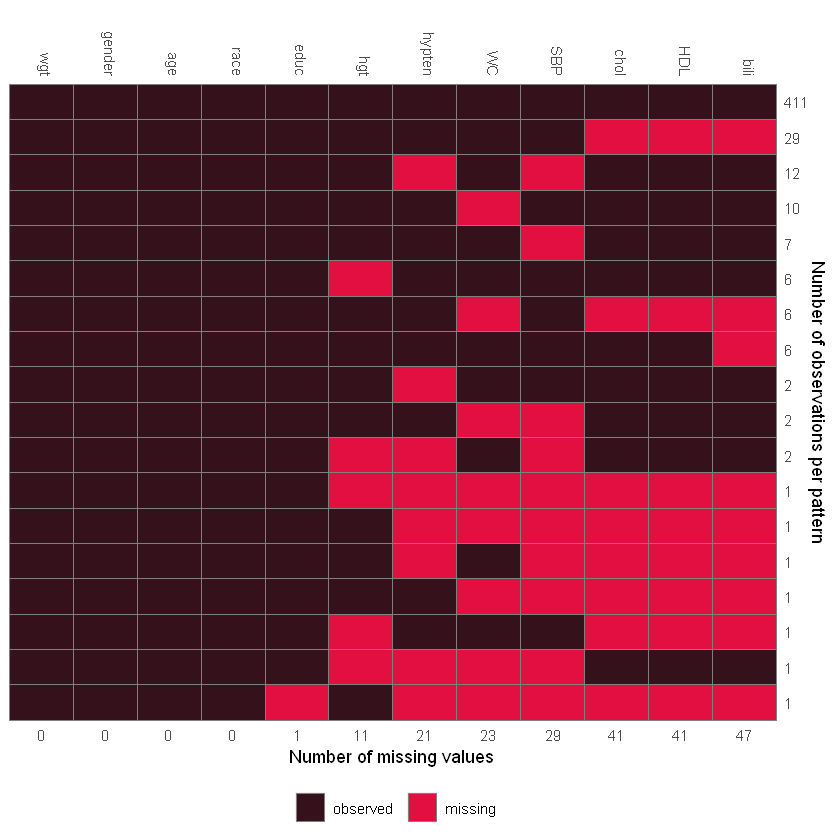

In [6]:
library(JointAI)
#pdf('joint.pdf')
md_pattern(NHANES2, pattern = FALSE, color = c('#34111b', '#e30f41'))
#dev.off()

In [ ]:
# Check convergence
pdf("it.pdf")
plot(imp, layout = c(6,6))
dev.off()

In [5]:
par(mar = c(3,3,2,1), mgp = c(2, 0.6,0))
#pdf('plots.pdf')
plot_all(NHANES2, breaks=30, ncol=4)
#dev.off()

png 
  2

In [ ]:
# density
pdf("marginal_n.pdf")
densityplot(imp,~SBP|hypten + gender)
dev.off()

In [8]:
# could we use a normal distribution for something?
imp <- mice(NHANES2, maxit=20, m=30, seed=1, printFlag=FALSE)

Warning message:
"package 'reshape2' is in use and will not be installed"SHA-1 hash of file is f8e69c429689d084809da7ee99db4411def17c68
Warning message:
"attributes are not identical across measure variables; they will be dropped"

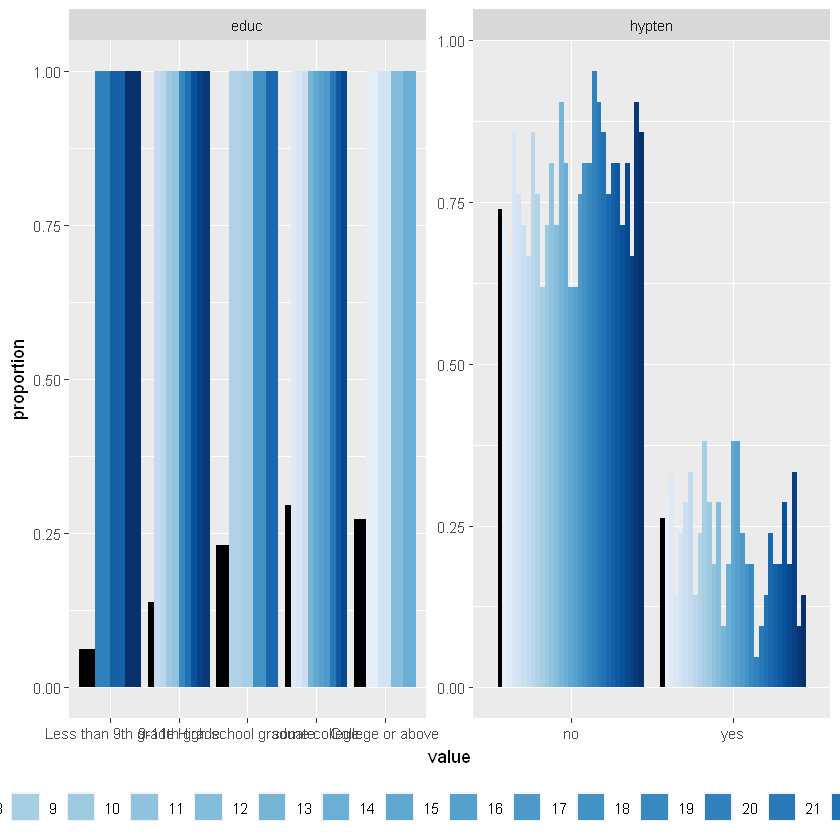

In [17]:
install.packages("reshape2")
require(devtools)
require(reshape2)
require(RColorBrewer)
require(ggplot2)
source_url("https://gist.githubusercontent.com/NErler/0d00375da460dd33839b98faeee2fdab/raw/c6f537ecf80eddcefd94992ec7926aa57d454536/propplot.R")

propplot(imp)



In [18]:
fit <- with(imp, lm(wgt ~ gender + age + hgt + WC))

est <- pool(fit)

summary(est, conf.int=TRUE)

term,estimate,std.error,statistic,df,p.value,2.5 %,97.5 %
(Intercept),-100.8520702,7.67289217,-13.143945,449.6454,0.000000e+00,-115.9312510,-85.7728894
genderfemale,-1.3850796,0.83448095,-1.659810,469.9080,9.761988e-02,-3.0248557,0.2546965
age,-0.1576829,0.02141424,-7.363458,451.6777,8.562040e-13,-0.1997668,-0.1155990
hgt,52.4292200,4.39636603,11.925581,444.3719,0.000000e+00,43.7889680,61.0694720
WC,1.0260613,0.02232811,45.953795,481.3369,0.000000e+00,0.9821887,1.0699340
